# 데이터 설명 및 목적

📌 목적: 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발

|변수 명|설명|
|:---|:---|
|`gender`|성별|
|`car`|차량 소유 여부|
|`reality`|부동산 소유 여부|
|`child_num`|자녀 수|
|`income_total`|연간 소득|
|`income_type`|소득 분류|
|`edu_type`|교육 수준|
|`family_type`|결혼 여부|
|`house_tpye`|생활 방식|
|`DAYS_BIRTH`|출생일, 데이터 수집 당시 (0)부터 역으로 셈|
|`DAYS_EMPLOYED`|업무 시작일, 데이터 수집 당시 (0)부터 역으로 셈, 양수 값은 고용되지 않은 상태|
|`FLAG_MOBIL`|핸드폰 소유 여부|
|`work_phone`|업무용 전화 소유 여부|
|`phone`|전화 소유 여부|
|`email`|이메일 소유 여부|
|`occyp_type`|직업 유형|
|`begin_month`|신용카드 발급 월, 데이터 수집 당시 (0)부터 역으로 셈|
|`credit`|사용자의 신용카드 대금 연체를 기준으로 한 신용도|



# (1) 준비 단계

## (1-1) 필요한 모듈 불러오기

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# (2) 데이터 불러오기

In [96]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/실습/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/실습/test.csv')
df_submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/실습/sample_submission.csv')

## (2-1) 데이터 형태 확인

In [97]:
print('train shape is:', df_train.shape)
print('test shape is:', df_test.shape)
print('submt shape is:', df_submit.shape)

train shape is: (26457, 20)
test shape is: (10000, 19)
submt shape is: (10000, 4)


* 각 파일을 로드하고 형태를 확인하였습니다.
* `train data`는 26,457개이고, `test data`는 10,000개입니다.
* 이제 각 파일에 있는 변수를 확인해보겠습니다.

In [98]:
print(df_train.columns, df_test.columns, df_submit.columns, sep='\n\n')

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month'],
      dtype='object')

Index(['index', '0', '1', '2'], dtype='object')


* `train data`에 `credit`변수가 존재합니다. 타깃 변수로 보입니다.(`train data`에 변수가 1개 더 많음)

In [99]:
display(df_train.head(3), df_test.head(3), df_submit.head(3))

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0


,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0


* `submision data`의 변수는 0, 1, 2로 이루어져 있습니다. 신용등급으로 확인이 됩니다.
* `train data`의 타깃변수인 `credit`을 확인해보겠습니다.

In [100]:
df_train['credit']

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64

* 신용등급이 확실하며, 우리는 이 데이터를 학습시키고 `submission data`에 결과를 전달하면 됩니다.

## (2-2) 각 Feature types 확인하기

* 향후 모델을 적용할 때 변수 유형이 제대로 설정되지 않으면 모델에 적용하기 어렵습니다.
* 일단 변수 유형을 확인하고 넘어가겠습니다.

In [101]:
print(df_train.dtypes, df_test.dtypes, sep='\n\n')

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
dtype: obj

## (2-3) 결측치 확인하기

In [102]:
print(df_train.isnull().sum() / df_train.shape[0]*100)

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64


In [103]:
print(df_test.isnull().sum() / df_train.shape[0]*100)

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       11.913671
family_size       0.000000
begin_month       0.000000
dtype: float64


* `occyp_type` 직업유형에서 결측치가 존재합니다.
* `train data`에서는 30%의 결측치가 존재하므로 변수를 제거해도 되지만, 일단 EDA과정을 거치고 삭제 여부를 판단해보겠습니다.

# (3) 탐색적 데이터 분석(EDA)

## (3-1) credit 확인하기

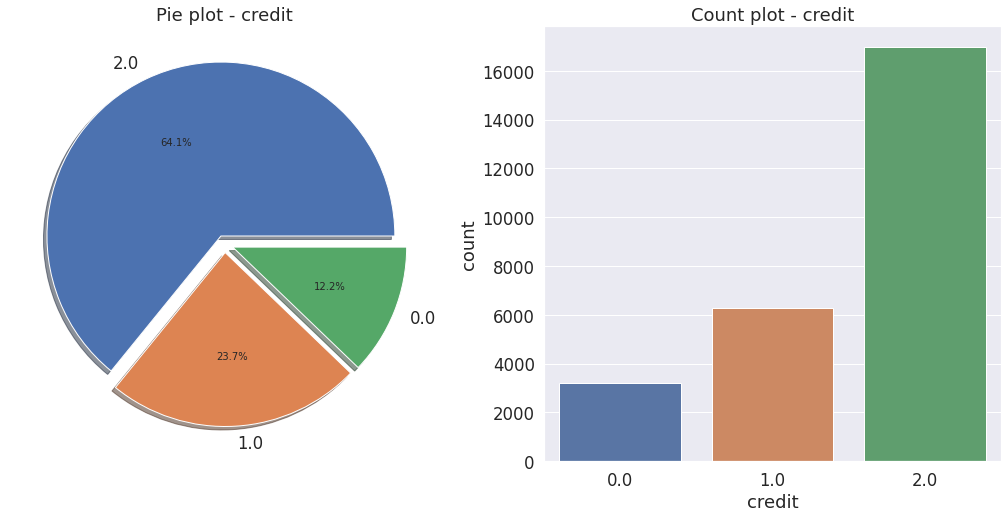

In [104]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['credit'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - credit')
ax[0].set_ylabel('')

sns.countplot('credit', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - credit')

plt.show()

* 0에 가까울 수록 높은 신용등급을 의미합니다.
* 2등급 신용카드 사용자가 월등하게 많습니다.

## (3-2) Heatmap 확인하기

* 타깃 변수의 비율을 확인했으니, 다른 변수들하고의 상관관계를 알아보기 위해 히트맵을 그려보겠습니다.

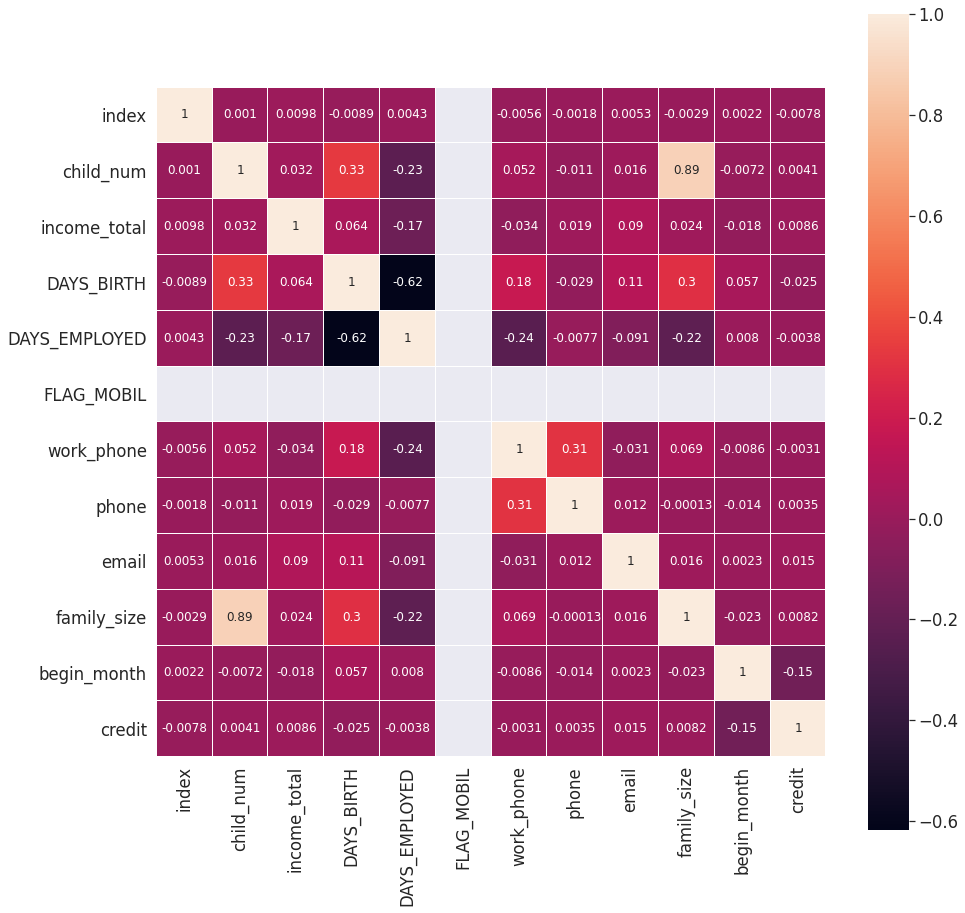

In [105]:
df = df_train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df, linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 12})

* 타깃변수(`credit`)과 관련있는 변수는 존재하지 않습니다.
* `child_num`과 `famliy_size`만 상관계수가 0.89로 매우 높습니다.

## (3-3) gender

In [106]:
pd.crosstab(df_train['gender'], df_train['credit'], margins=True)

credit,0.0,1.0,2.0,All
gender,,,,
F,2148,4220,11329,17697
M,1074,2047,5639,8760
All,3222,6267,16968,26457


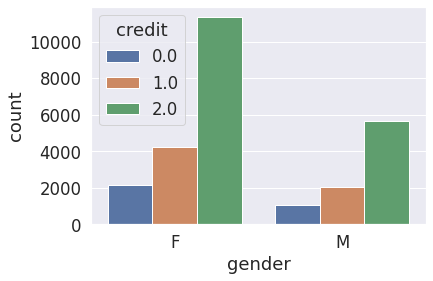

In [107]:
sns.countplot('gender', hue='credit', data=df_train)

* 남성과 여성으로 분류했을 때 여성이 더 많습니다.
* 또한, 모든 등급에서도 여성이 더 많습니다.

## (3-4) car

* 차량 소지 여부를 탐색해보겠습니다.

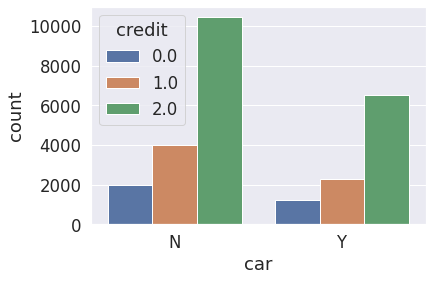

In [108]:
sns.countplot('car', hue='credit', data=df_train)

* 모든 등급에서 차량을 소지하지 않은 사람이 더 많습니다.

## (3-5) reality

* 부동산 소유 여부를 탐색해보겠습니다.

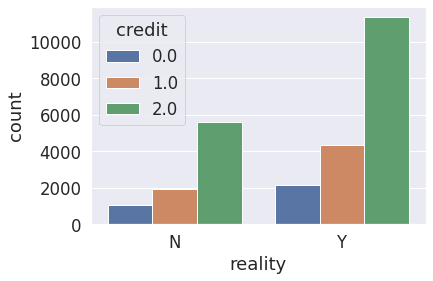

In [109]:
sns.countplot('reality', hue='credit', data=df_train)

* 부동산을 소유한 사람이 더 많습니다.
* 각 등급별로 2배 정도 차이나는 것 같습니다.

## (3-6) child_num

* 각 등급별 자녀의 수를 탐색해보겠습니다.

In [110]:
print(df_train['child_num'].value_counts())

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64


* 자녀가 19명인 경우도 있습니다.
* 중국의 데이터라 그런 것 같습니다.

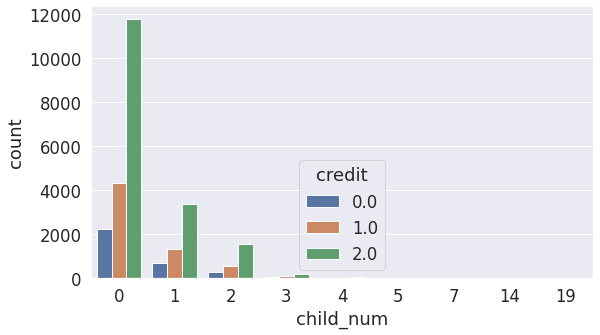

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.countplot(x='child_num', hue='credit', palette='deep', data=df_train)

plt.show()

* 자녀가 없는 경우가 제일 많습니다.
* 이후 자녀가 2명 이상인 경우부터는 관측치의 개수가 현저하게 적습니다.

## (3-7) income_total


* 연간 소득을 탐색해보겠습니다.

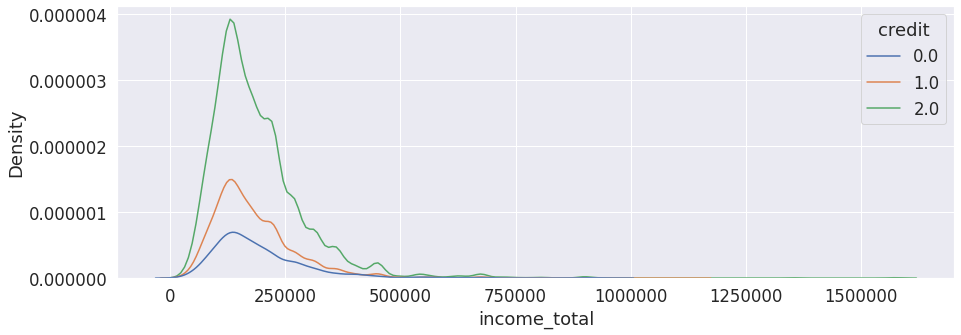

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(x='income_total', hue='credit', palette='deep', data=df_train, ax=ax)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

* 각 등급별 밀도의 차이는 존재하나, 별다른 차이는 없어보입니다.

## (3-8) income_type

* 신용 등급에 따른 소득 분류 차이를 확인하겠습니다.
* 등급별로 데이터를 나누고 시각화를 진행해보겠습니다.

In [113]:
train_0 = df_train[df_train['credit'] == 0]
train_1 = df_train[df_train['credit'] == 1]
train_2 = df_train[df_train['credit'] == 2]

In [114]:
# Categorical 그래프 함수 정의
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

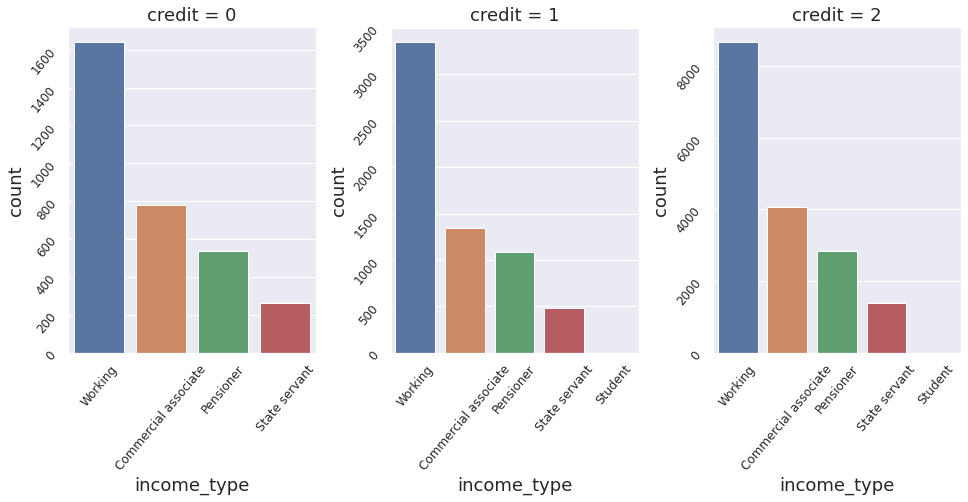

In [115]:
cat_plot('income_type')

* 높은 신용등급(0등급에 가까운 정도)는 `student`가 존재하지 않습니다.
* 아무래도 경제활동이 적을 수밖에 없는 학생은 신용등급이 낮습니다.

## (3-9) edu_type

* 교육 수준을 살펴보겠습니다.

In [116]:
df_train.groupby(['credit', 'edu_type'])['credit'].count()

credit  edu_type                     
0.0     Academic degree                      2
        Higher education                   909
        Incomplete higher                  114
        Lower secondary                     28
        Secondary / secondary special     2169
1.0     Academic degree                      7
        Higher education                  1751
        Incomplete higher                  246
        Lower secondary                     59
        Secondary / secondary special     4204
2.0     Academic degree                     14
        Higher education                  4502
        Incomplete higher                  660
        Lower secondary                    170
        Secondary / secondary special    11622
Name: credit, dtype: int64

* 얼추 보면 `Secondary / Secondary special` > `Higher education` > `Incomplete higher` 순입니다.

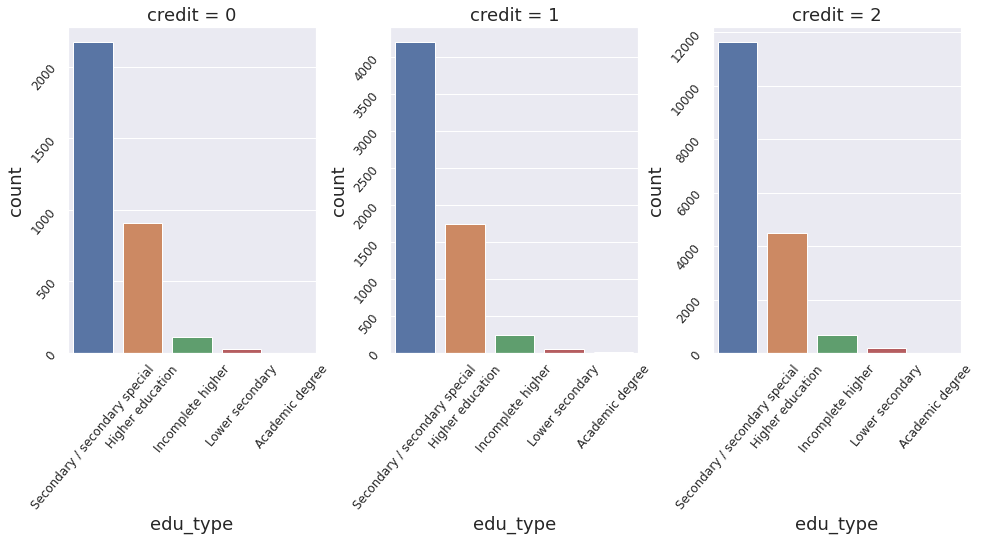

In [117]:
cat_plot('edu_type')

* 마찬가지로 위에서 언급했던 순서와 일치합니다.
* 즉 교육 수준의 차이는 없다는 것을 확인하였습니다.

## (3-10) family_type

* 결혼 여부를 탐색해보겠습니다.

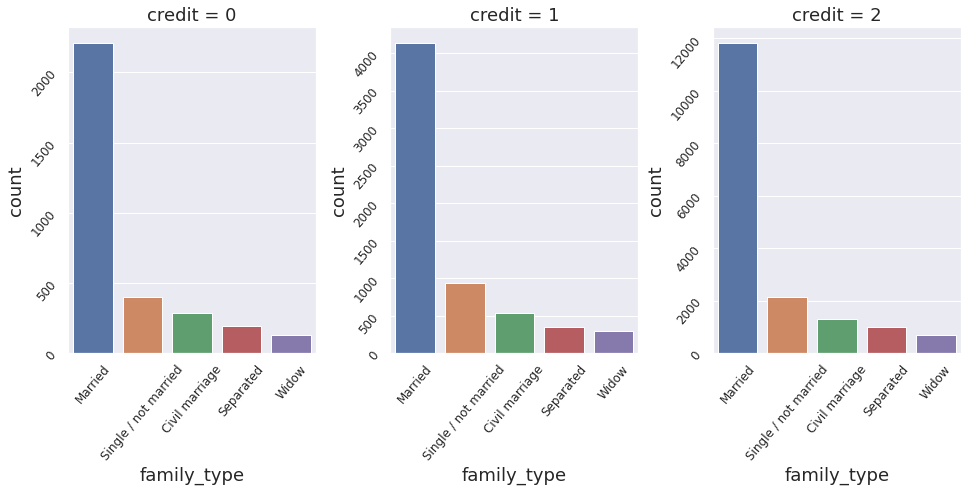

In [118]:
cat_plot('family_type')

* 모든 등급에서 결혼한 사람이 월등하게 많습니다.


## (3-11) house_type

* 신용 등급별 생활 방식의 차이를 탐색해보겠습니다.

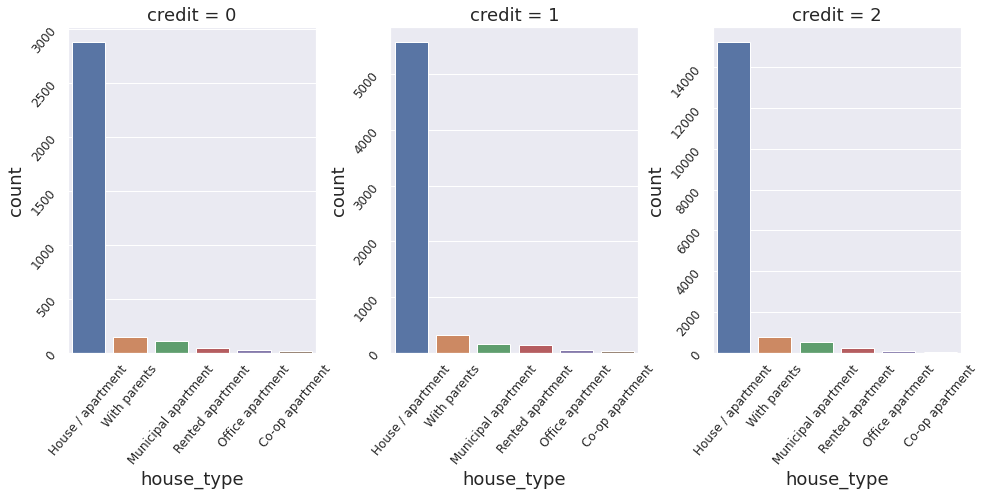

In [119]:
cat_plot('house_type')

* 생활 방식도 별 차이가 없습니다.

## (3-12) FLAG_MOBIL

* 핸드폰 소유 여부에 따른 신용등급도 확인해보겠습니다.

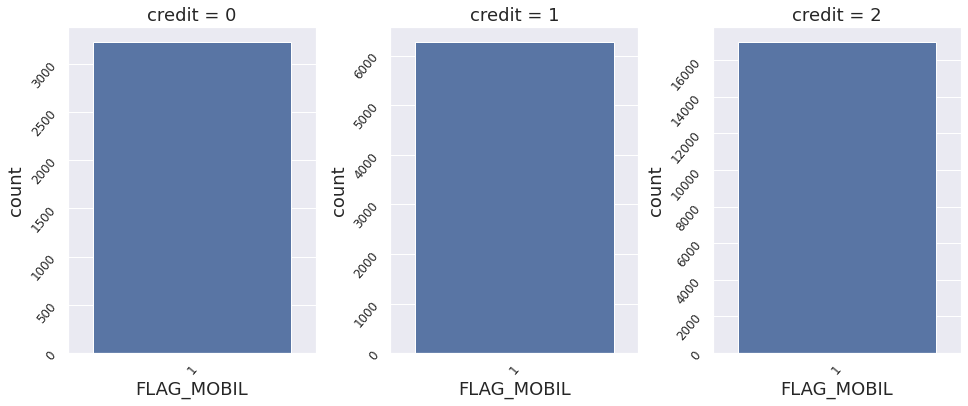

In [120]:
cat_plot('FLAG_MOBIL')

* 등급별로 모든 사람이 휴대폰을 소지하고 있습니다.

## (3-13) work_phone

* 업무용 휴대폰 소유 여부에 따른 신용등급별 차이를 확인해보겠습니다.

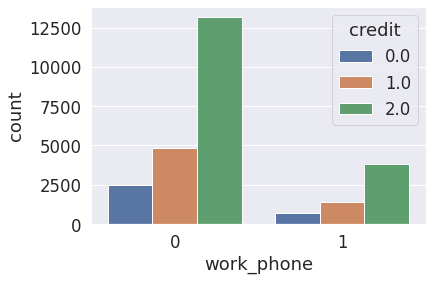

In [121]:
sns.countplot('work_phone', hue='credit', data=df_train)

## (3-14) phone


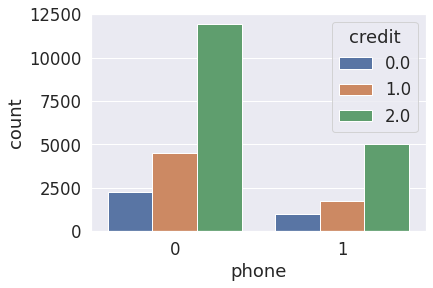

In [122]:
sns.countplot('phone', hue='credit', data=df_train)

## (3-15) email

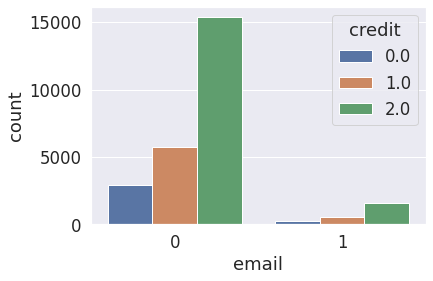

In [123]:
sns.countplot('email', hue='credit', data=df_train)

## (3-16) occyp_type

* 직업유형을 살펴보겠습니다.

In [124]:
train_0 = train_0.fillna({'occyp_type':'No job'})
train_1 = train_1.fillna({'occyp_type':'No job'})
train_2 = train_2.fillna({'occyp_type':'No job'})

# 결측값이 존재하기 때문에 결측값은 직업이 없는 것으로 채워넣겠습니다.

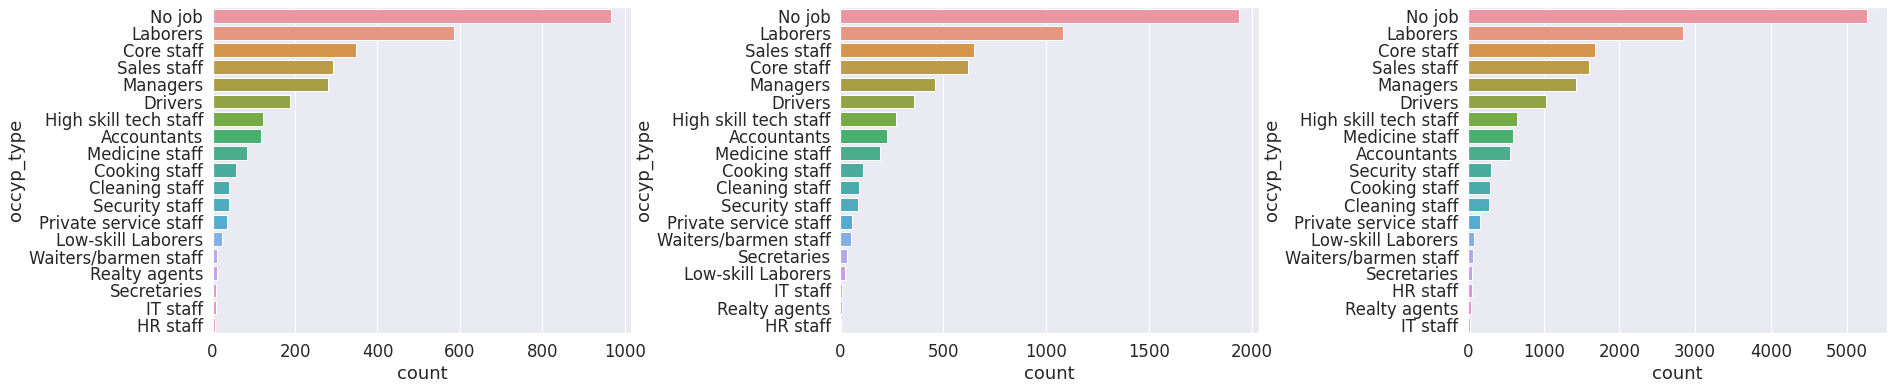

In [125]:
f, ax = plt.subplots(1, 3, figsize=(30, 6))
sns.countplot(y = 'occyp_type', data = train_0, order = train_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train_1, order = train_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train_2, order = train_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

* 등급별로 직업 유형의 순위가 조금 다르나, 비슷합니다.

## (3-17) DAYS_BIRTH

* 출생일에 따른 신용등급도 확인해보겠습니다.

In [126]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [127]:
train_0['Age'] = abs(train_0['DAYS_BIRTH'])/360
train_1['Age'] = abs(train_1['DAYS_BIRTH'])/360
train_2['Age'] = abs(train_2['DAYS_BIRTH'])/360
train_0['Age'].head()

3     41.911111
7     41.377778
12    33.161111
15    35.719444
22    42.216667
Name: Age, dtype: float64

In [128]:
train_0 = train_0.astype({'Age': 'int'})
train_1 = train_1.astype({'Age': 'int'})
train_2 = train_2.astype({'Age': 'int'})
train_0['Age'].head()

3     41
7     41
12    33
15    35
22    42
Name: Age, dtype: int64

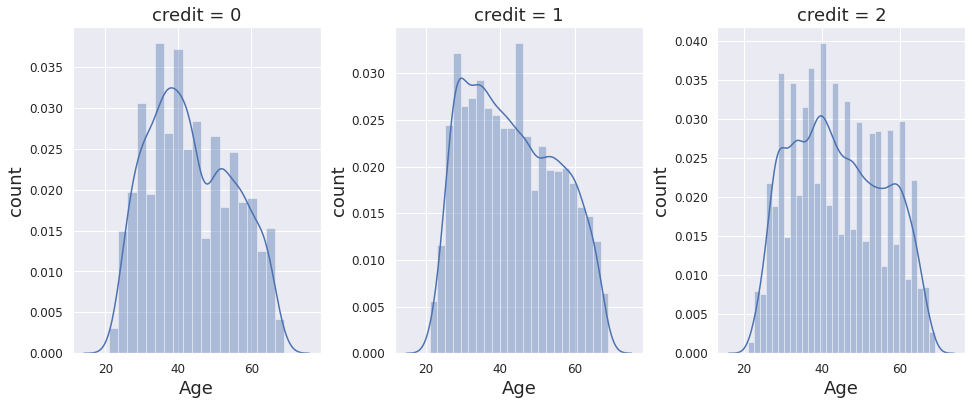

In [129]:
num_plot('Age')

## (3-18) DAYS_EMPLOYED

* 업무 기간에 따른 신용등급도 확인해보겠습니다.

In [130]:
# 업무 기간이 양수인 경우 무직을 의미합니다. 따라서 0으로 대체하겠습니다.
train_0['EMPLOYED']= train_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_1['EMPLOYED']= train_1['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_2['EMPLOYED']= train_2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)

train_0['EMPLOYED'] = abs(train_0['EMPLOYED'])/360
train_1['EMPLOYED'] = abs(train_1['EMPLOYED'])/360
train_2['EMPLOYED'] = abs(train_2['EMPLOYED'])/360

train_0['EMPLOYED'].head()

3      5.811111
7     15.055556
12     6.005556
15    11.266667
22     3.769444
Name: EMPLOYED, dtype: float64

In [131]:
train_0 = train_0.astype({'EMPLOYED': 'int'})
train_1 = train_1.astype({'EMPLOYED': 'int'})
train_2 = train_2.astype({'EMPLOYED': 'int'})

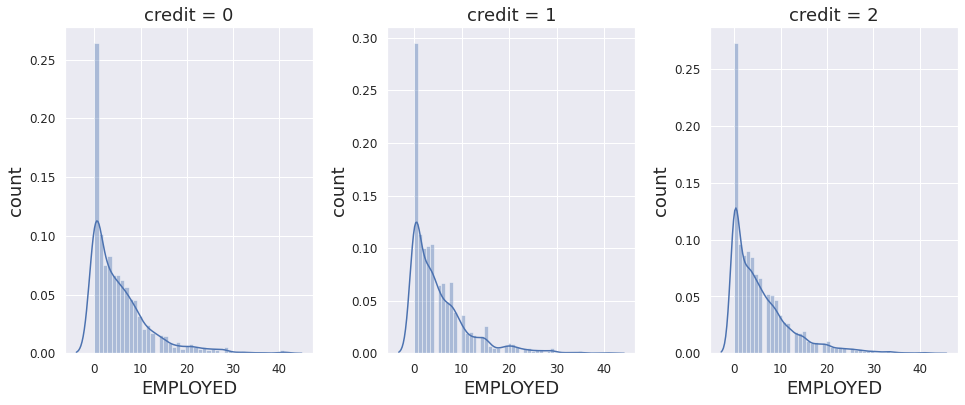

In [132]:
num_plot('EMPLOYED')

* 업무 기간도 별다른 차이가 없습니다.

## (3-19) begin_month

* 신용카드 발급기간에 따른 신용등급도 확인해보겠습니다.

In [133]:
train_0['Month'] = abs(train_0['begin_month'])
train_1['Month'] = abs(train_1['begin_month'])
train_2['Month'] = abs(train_2['begin_month'])

train_0 = train_0.astype({'Month': 'int'})
train_1 = train_1.astype({'Month': 'int'})
train_2 = train_2.astype({'Month': 'int'})
train_0['Month'].head()

3     37
7     53
12    60
15    60
22    22
Name: Month, dtype: int64

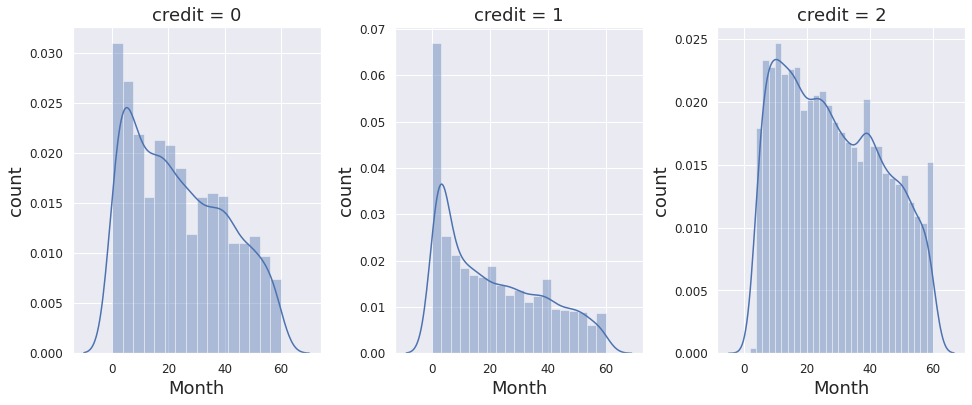

In [134]:
num_plot("Month")

* 대부분 카드를 발급 받은지 10달 이하인 사람들이 많았습니다.

## (3-20) EDA에서 확인할 수 있었던 것
1. 모든 등급에서 여성이 더 많았습니다.
2. 차량을 소지하지 않은 사람이 더 많았습니다.
3. 부동산을 소유한 사람이 더 많았으며 각 등급별 2배 가량 차이가 납니다.
4. 자녀가 없는 경우가 제일 많았습니다.
5. 연간소득은 등급별 차이가 크지 않습니다.
6. 직업유형의 순위도 비슷합니다.
7. 결혼한 사람이 훨씬 많았습니다.
8. 생활방식도 등급별 차이가 없었습니다.
9. 모든 사람이 휴대폰을 가지고 있습니다.
10. child_num <> family_size는 상관계수가 0.89로 둘 중 하나는 제거하는 것이 좋아보입니다.<br>



상관계수 히트맵으로도 확인했지만, 신용등급에 영향을 많이 미치는 독립변수는 찾아보기 힘들었습니다.<br>
일단 각 변수별 유형을 다시 한번 확인하고 모델링을 진행해보는 것이 좋아보입니다.

# (4) 모델 구성 전 데이터 전처리

In [135]:
df_train_copy = df_train.copy

* EDA한 것을 바탕으로 데이터 전처리를 해보겠습니다.

## (4-1) occyp_type 전처리

In [136]:
print(df_train.isnull().sum() / df_train.shape[0]*100)

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64


직업유형 `occyp_type`은 전체 데이터 비율에서 30%가 결측입니다.<br>
그리고 타깃 변수인 신용등급과의 상관계수가 0에 가까우므로 과감하게 제거해도 무방하다고 판단했습니다.

In [137]:
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [141]:
df_train = df_train.drop(['occyp_type'], axis=1)
df_test = df_test.drop(['occyp_type'], axis=1)

In [142]:
display(df_train.columns, df_test.columns)

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month'],
      dtype='object')

---

## (4-2) child_num, family_size 전처리

* 자녀의 수 `child_num`과 `family_size`는 서로 상관관계가 뚜렷합니다.
* 따라서 변수 중 하나를 제거하거나 두 변수를 합쳐서 새로운 변수로 만들 수 있습니다.

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor